In [ ]:
import pandas as pd
import numpy as np
students_data=pd.read_csv('/content/placement.csv')

In [ ]:
students_data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


<Axes: xlabel='cgpa', ylabel='package'>

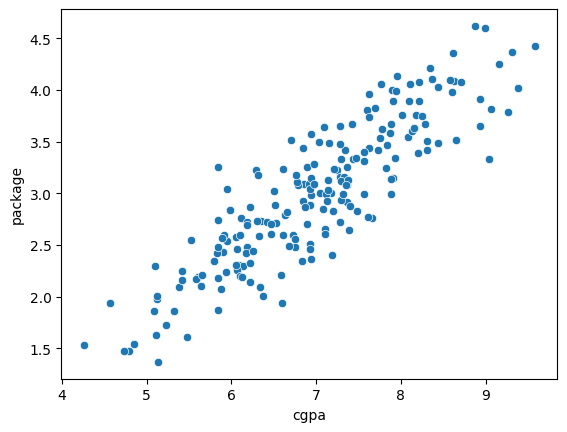

In [ ]:
import seaborn as sns
sns.scatterplot(students_data,x='cgpa',y='package')

In [ ]:
X=students_data.iloc[:,0:1].values
y=students_data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split ,cross_val_score,KFold
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression as lr
model=lr()

In [ ]:
Kfold=KFold(n_splits=25,shuffle=True,random_state=99)
score=cross_val_score(model,X,y,cv=Kfold)

In [ ]:
print(f'Cross_validation_score of  Model:{np.mean(score)*100}')

Cross_validation_score of  Model:67.90841492538343


In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.55574241])

In [ ]:
model.intercept_

-0.8781178361812025

In [ ]:
Kfold=KFold(n_splits=25,shuffle=True,random_state=99)
score=cross_val_score(model,X_train,y_train,cv=Kfold)

In [ ]:
print(f'Cross_validation_score of  Model:{np.mean(score)*100}')

Cross_validation_score of  Model:45.19509533865221


In [ ]:
pred_reg=model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
score=r2_score(y_test,pred_reg)
print(f"Test score:{score*100}")

Test score:77.36419609402847


In [ ]:
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_reg))
print('Mean Squared Error:',mean_squared_error(y_test, pred_reg))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, pred_reg)))

Mean Absolute Error: 0.2874910067960929
Mean Squared Error: 0.1185889515124916
Root Mean Squared Error: 0.3443674658159385


In [ ]:
d={'Actual_salary':y_test,'predicted_salary':pred_reg}
prediction_df=pd.DataFrame(d)

In [ ]:
prediction_df

,Actual_salary,predicted_salary
112,4.10,3.890152
29,3.49,3.095440
182,2.08,2.389648
199,2.33,2.578600
193,1.94,1.661625
85,1.48,1.783888
10,1.86,2.078432
54,3.09,2.934275
115,4.21,3.762331
35,2.87,2.939833


In [ ]:
residual=y_test-pred_reg

In [ ]:
residual.skew()

0.11179616999287906

<ipython-input-60-de15f7a7b687>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: xlabel='package', ylabel='Density'>

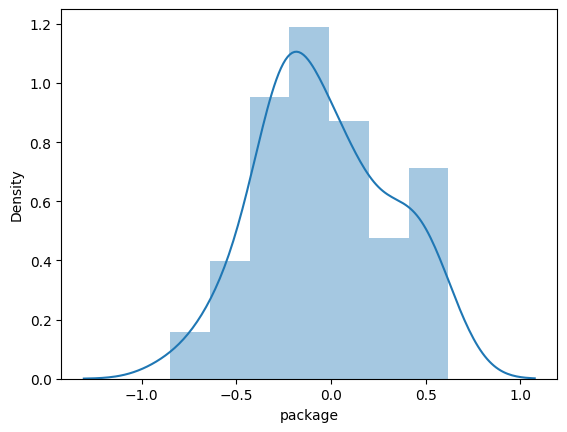

In [ ]:
sns.distplot(residual)

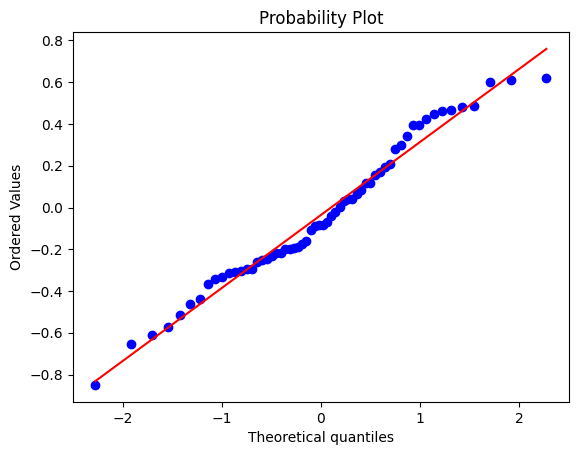

In [ ]:
import pylab
import scipy.stats as s
s.probplot(residual,dist='norm',plot=pylab)
pylab.show()

In [ ]:
import plotly.express as px
fig=px.scatter(prediction_df,x='predicted_salary',y='Actual_salary',
               color='predicted_salary',opacity=0.6,trendline='ols',template='plotly_dark',title=('Predicted Vs. Actual'))

fig.update_layout(
    title = {
        "font" :{
            "size" : 28,
            "family" : "tahoma"
        }
    }
)
fig.show()

In [ ]:
X_train.shape[0]

140

In [ ]:
X_train.mean()

7.001785714285713

##`Linear reg. without external library`

In [ ]:
import numpy as np

class Linear_reg_without_external_library:
    def __init__(self):
        self.m = None
        self.c = None

    def fit(self, X_train, y_train):
        # Ensure X_train and y_train are numpy arrays
        X_train = np.array(X_train)
        y_train = np.array(y_train)

        # Calculate slope (m) and intercept (c) using the formula
        num = 0
        den = 0
        for i in range(len(X_train)):
            num += (X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean())
            den += (X_train[i] - X_train.mean()) ** 2

        self.m = num / den
        self.c = y_train.mean() - self.m * X_train.mean()
        print(f"Slope (m): {self.m}")
        print(f"Intercept (c): {self.c}")

    def prediction(self, X_test):
        # Ensure X_test is a numpy array
        X_test = np.array(X_test)
        return self.m * X_test + self.c

In [ ]:
lr=Linear_reg_without_external_library()

In [ ]:
lr.fit(X_train, y_train)

Slope (m): [0.55574241]
Intercept (c): [-0.87811784]


In [ ]:
lr.prediction(X_test[0])

array([3.89015204])

In [ ]:
pred_reg=np.array(lr.prediction(X_test))

In [ ]:
# Ensure y_test and pred_reg are 1-dimensional
y_test = y_test.ravel()  # If y_test is a 2D array
pred_reg = pred_reg.ravel()  # If pred_reg is a 2D array

In [ ]:
d={'Actual_salary':y_test,'predicted_salary':pred_reg}
prediction=pd.DataFrame(d)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
score=r2_score(y_test,pred_reg)
print(f"Test score:{score*100}")

Test score:77.36419609402849


In [ ]:
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_reg))
print('Mean Squared Error:',mean_squared_error(y_test, pred_reg))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, pred_reg)))

Mean Absolute Error: 0.2874910067960929
Mean Squared Error: 0.11858895151249155
Root Mean Squared Error: 0.34436746581593847


In [ ]:
residuals=y_test-pred_reg

In [ ]:
pd.DataFrame(residuals).skew()

,0
0,0.111796


<ipython-input-116-449001059fb5>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

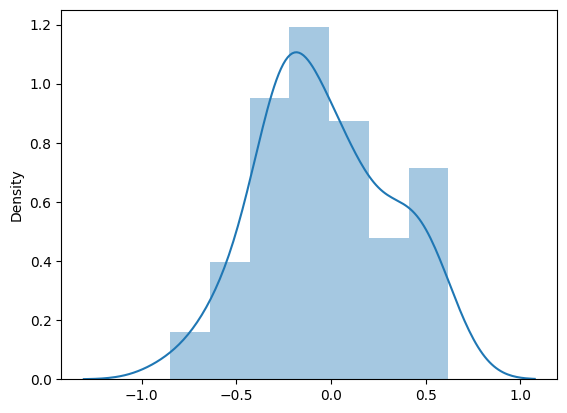

In [ ]:
sns.distplot(residuals)

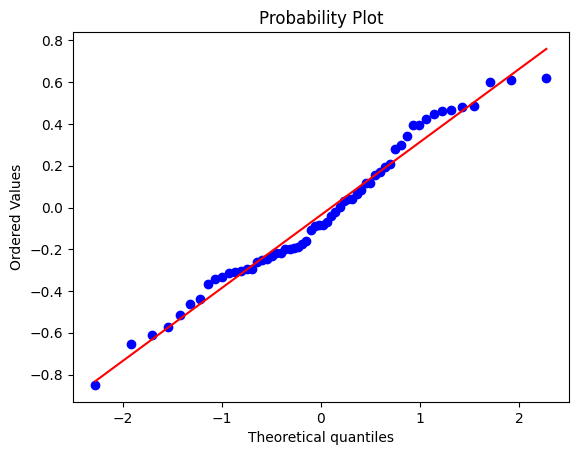

In [ ]:
import pylab
import scipy.stats as s
s.probplot(residuals,dist='norm',plot=pylab)
pylab.show()

In [ ]:
import plotly.express as px
fig=px.scatter(prediction,x='predicted_salary',y='Actual_salary',
               color='predicted_salary',opacity=0.6,trendline='ols',template='plotly_dark',title=('Predicted Vs. Actual'))

fig.update_layout(
    title = {
        "font" :{
            "size" : 28,
            "family" : "tahoma"
        }
    }
)
fig.show()